In [11]:
def load_csv_files(name):
    # Construct file paths
    right_file_path = f'data/{name}_R.csv'
    left_file_path = f'data/{name}_L.csv'

    # Function to process each file
    def process_file(file_path):
        data_list = []
        current_row = []
        with open(file_path, mode='r', encoding='utf-8') as file:
            next(file)  # Skip the header
            for line in file:
                # Check if the line starts with 'S'
                if line.strip().startswith("S"):
                    if current_row:
                        # Ensure the row has 10 items
                        while len(current_row) < 10:
                            current_row.append('NaN')
                        # Add the completed row to data_list
                        data_list.append(current_row)
                        current_row = []
                # Split the line by commas and extend the current row
                current_row.extend(line.strip().split(','))
            # Ensure the last row has 10 items
            if current_row:
                while len(current_row) < 10:
                    current_row.append('NaN')
                data_list.append(current_row)
        return data_list

    # Load the files into lists
    try:
        right_df = process_file(right_file_path)
        left_df = process_file(left_file_path)
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None, None

    return right_df, left_df

file_name = "test1"
right, left = load_csv_files(file_name)

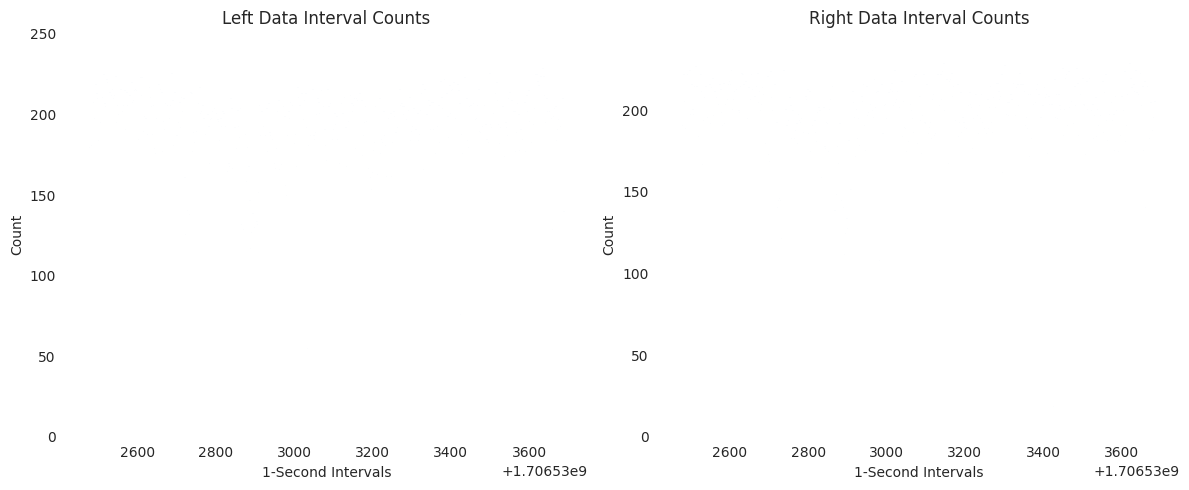

In [20]:
import matplotlib.pyplot as plt

def create_count_plots(left_df, right_df):
    # Function to calculate the 30-second interval for a timestamp
    def calculate_interval(timestamp):
        return timestamp // 1000

    # Function to count items in each interval
    def count_intervals(data):
        interval_counts = {}
        for row in data:
            try:
                timestamp = int(row[-1])  # Assuming the timestamp is the last item
                interval = calculate_interval(timestamp)
                interval_counts[interval] = interval_counts.get(interval, 0) + 1
            except ValueError:
                continue  # Skip rows with invalid data
        return interval_counts

    # Count the intervals for left and right data
    left_counts = count_intervals(left_df)
    right_counts = count_intervals(right_df)

    # Plotting the counts
    plt.figure(figsize=(12, 5))

    # Left data plot
    plt.subplot(1, 2, 1)
    plt.bar(left_counts.keys(), left_counts.values())
    plt.title("Left Data Interval Counts")
    plt.xlabel("1-Second Intervals")
    plt.ylabel("Count")

    # Right data plot
    plt.subplot(1, 2, 2)
    plt.bar(right_counts.keys(), right_counts.values())
    plt.title("Right Data Interval Counts")
    plt.xlabel("1-Second Intervals")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

# Call the function with the left and right data
create_count_plots(left, right)


Left Data Statistics:
  - 3 Minimum Frequencies: [55, 76, 100]
  - Average Frequency: 195.81
  - 3 Maximum Frequencies: [230, 232, 239]
----------------------------------------
Right Data Statistics:
  - 3 Minimum Frequencies: [2, 19, 96]
  - Average Frequency: 199.22
  - 3 Maximum Frequencies: [232, 233, 236]
----------------------------------------


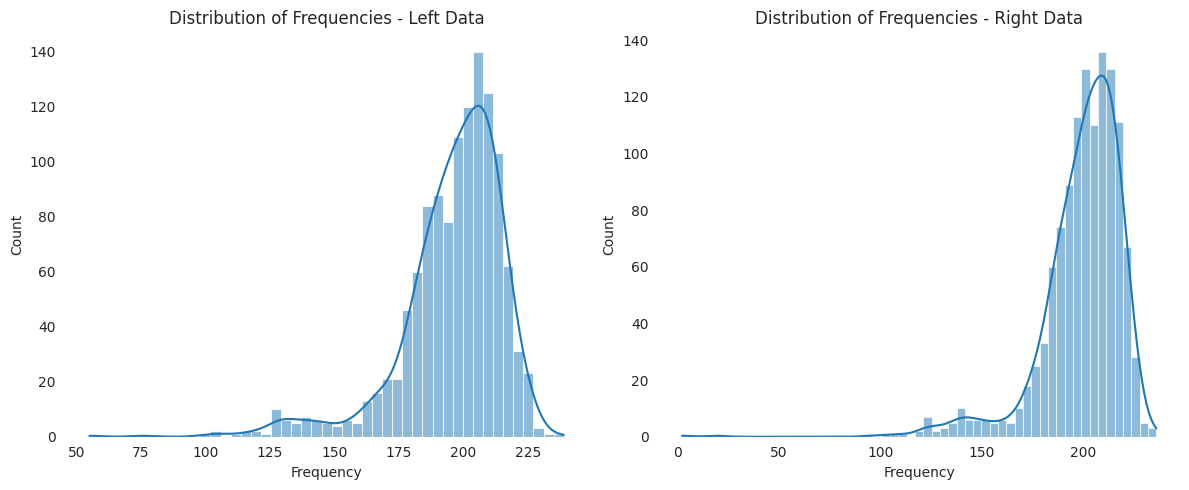

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
def create_freq_lists_and_stats(left_df, right_df):

    def create_freq_list(data):
        interval_counts = {}
        for row in data:
            try:
                timestamp = int(row[-1])
                interval = calculate_interval(timestamp)
                interval_counts[interval] = interval_counts.get(interval, 0) + 1
            except ValueError:
                continue
        return list(interval_counts.values())

    # Create frequency lists
    freq_l = create_freq_list(left_df)
    freq_r = create_freq_list(right_df)

    def calculate_stats(freq_list, label):
        freq_list.sort()
        min_freq = freq_list[:3]
        max_freq = freq_list[-3:]
        avg_freq = sum(freq_list) / len(freq_list)
        print(f"{label} Statistics:")
        print(f"  - 3 Minimum Frequencies: {min_freq}")
        print(f"  - Average Frequency: {avg_freq:.2f}")
        print(f"  - 3 Maximum Frequencies: {max_freq}")
        print("-" * 40)  # Separator for clarity

    # Calculate and print statistics for each list
    calculate_stats(freq_l, "Left Data")
    calculate_stats(freq_r, "Right Data")

    return freq_l, freq_r

# Call the function and get the frequency lists
freq_l, freq_r = create_freq_lists_and_stats(left, right)

def create_dist_plots(freq_l, freq_r):
    plt.figure(figsize=(12, 5))

    # Distribution plot for freq_l
    plt.subplot(1, 2, 1)
    sns.histplot(freq_l, kde=True)
    plt.title("Distribution of Frequencies - Left Data")
    plt.xlabel("Frequency")
    plt.ylabel("Count")

    # Distribution plot for freq_r
    plt.subplot(1, 2, 2)
    sns.histplot(freq_r, kde=True)
    plt.title("Distribution of Frequencies - Right Data")
    plt.xlabel("Frequency")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

# Call the function to create distribution plots
create_dist_plots(freq_l, freq_r)
